In [1]:

pd.set_option('display.max_columns', None)
import re
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict 

# Import packages for data cleaning
import numpy as np
import pandas as pd
import re # For finding specific strings in the text
# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
sw = sw + ['coffee','coffees','cup','john', 'diruocco','jen','apodaca','ken','kevin','keurig','espresso','serve','capsule','device','serving','flavor','notes','mouthfeel','aroma','finish','brewed','brewing','parts','one','two','three','evaluate','evaluated','hint']

In [3]:
with open('coffee_words.pickle','rb') as read_file:
    coffee = pickle.load(read_file)
with open('coffee_ratings.pickle','rb') as read_file:
    ratings = pickle.load(read_file)

In [114]:
with open('df_topic_breakdown.pickle','rb') as read_file:
    df_topic_breakdown = pickle.load(read_file)

In [115]:
df_topic_breakdown.head()

,roaster,origin,roast_level,rating,length,word count,group,bright_floral_citrus,choc_woody_dark,tart_sweet_smooth,cacao_nut_clean,sweet_nut_pine,juicy_cacao_honey,red_berries,woody_nut_caramel,cherry_vinuous_choc
0,Jackrabbit Java,Costa Rica,Medium-Light,93,257,24,4,0.000000,0.045379,0.073064,0.000000,0.104257,0.000000,0.010795,0.000000,0.000000
1,Jackrabbit Java,"Nyamasheke District, Rwanda",Medium-Light,92,248,26,2,0.018180,0.000000,0.073098,0.063934,0.000000,0.009512,0.000000,0.006350,0.012827
2,Red Rooster Coffee Roaster,"Los Naranjos, La Argentina, Huila Department, ...",Light,96,365,32,2,0.017113,0.000000,0.077220,0.000000,0.027378,0.000000,0.007769,0.003145,0.022832
3,Paradise Roasters,"Huila, Colombia",Light,95,268,27,2,0.008159,0.000000,0.143630,0.006424,0.000000,0.000000,0.000000,0.000000,0.005296
4,Kakalove Cafe,"Antioquia Department, Colombia",Medium-Light,95,261,29,6,0.000000,0.037483,0.074243,0.009381,0.000000,0.000000,0.114548,0.000000,0.053789


In [218]:
temporary = pd.DataFrame()
temporary['review'] = coffee.Review.str.lower()
temporary['group'] = df_topic_breakdown.group
temporary.head()

,review,group
0,"yeasty, richly sweet-savory. fresh-baked bread...",4
1,"balanced, sweet-toned, floral. tea rose, cocoa...",2
2,"delicate, deep; complex. pomegranate, macadami...",2
3,"very sweet, floral-toned. freesia, pink grapef...",2
4,"opulent, richly sweet-tart-savory. black curra...",6


## EDA on scores in categories

In [10]:
ratings.Aroma.isnull().sum()

51

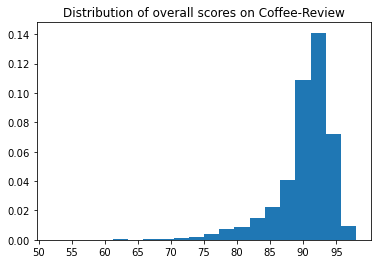

In [5]:
scores = ratings[ratings.Overall != 'NR'].Overall.astype(int)
plt.hist(sorted(scores), bins=20,density=True)
plt.xticks(np.arange(50,100,5))
plt.title('Distribution of overall scores on Coffee-Review')
plt.show();

Text(0.5, 1.0, 'Acidity')

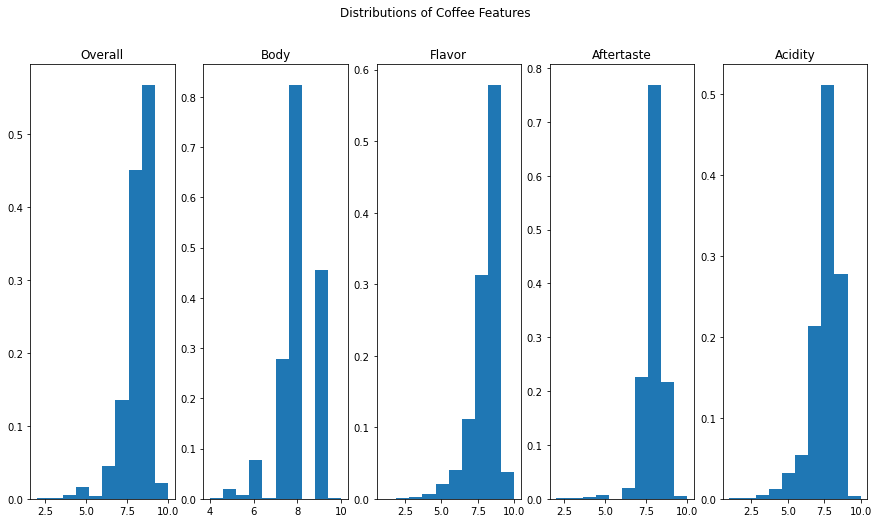

In [74]:
fig, axs = plt.subplots(1, 5, figsize=(15,8))
fig.suptitle('Distributions of Coffee Features')

aroma = ratings[(ratings.Aroma != 'NR')&(ratings.Aroma != 'NA')&(ratings.Aroma.isnull() == False)].Aroma.astype(float)
axs[0].hist(sorted(aroma),density=True)
axs[0].set_title('Overall')
body = ratings[(ratings.Body != 'NR')&(ratings.Body != 'NA')&(ratings.Body.isnull() == False)].Body.astype(float)
axs[1].hist(sorted(body),density=True)
axs[1].set_title('Body')
flavor = ratings[(ratings.Flavor != 'NR')&(ratings.Flavor != 'NA')&(ratings.Flavor.isnull() == False)].Flavor.astype(float)
axs[2].hist(sorted(flavor),density=True)
axs[2].set_title('Flavor')
aftertaste = ratings[(ratings.Aftertaste != 'NR')&(ratings.Aftertaste != 'NA')&(ratings.Aftertaste.isnull() == False)].Aftertaste.astype(float)
axs[3].hist(sorted(aftertaste),density=True)
axs[3].set_title('Aftertaste')
acidity = ratings[(ratings.Acidity != 'NR')&(ratings.Acidity != 'NA')&(ratings.Acidity != 'na')&(ratings.Acidity != 'n/a')&(ratings.Acidity != 'Very Low')&(ratings.Acidity != 'Low')&(ratings.Acidity != 'Moderate')&(ratings.Acidity.isnull() == False)].Acidity.astype(float)
axs[4].hist(sorted(acidity),density=True)
axs[4].set_title('Acidity')
# for ax in fig.get_axes():
#     ax.label_outer()

In [79]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [76]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

## Word Clouds

In [ ]:
train = coffee

In [ ]:
print(word_tokenize(coffee.Review[0]))

In [ ]:
trial = coffee.Review[1]+coffee.Notes[1]+coffee.TLDR[1]
trial

In [ ]:
preprocess_textlemma(trial)

In [80]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [ ]:
textblob_object = TextBlob(trial)
tb_words = textblob_object.words
print(tb_words)
Word(tb_words)

In [ ]:
for noun_phrase in textblob_object.noun_phrases:
    print(noun_phrase.correct().lower())

In [220]:
reviews = ['','','','','','','','','']
for i in range(0,9):
    for row in temporary[(temporary.group == i )&(temporary.review != 'NA')].review.astype(str):
        reviews[i] += row + ' '

In [127]:
words = ['','','','','','','','','']
words[0]+'coffee'
df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')].roast_level

69             Light
145     Medium-Light
472     Medium-Light
599     Medium-Light
1094    Medium-Light
            ...     
4945          Medium
5017          Medium
5742     Medium-Dark
5758     Medium-Dark
5915          Medium
Name: roast_level, Length: 487, dtype: object

In [215]:
words = ['','','','','','','','','']
for i in range(0,9):
    for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')].roast_level.astype(str):
        words[i] += row + ' '
    for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')].origin.astype(str):
        words[i] += row + ' '

In [ ]:
for i in range(0,9):
    for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')].roast_level.astype(str):
        words[i] += row + ' '
    for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')].origin.astype(str):
        words[i] += row + ' '

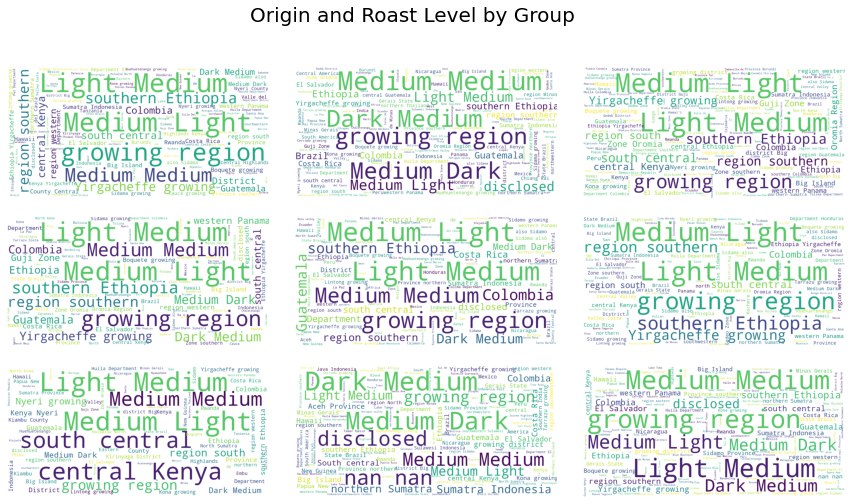

In [214]:
def topicWordCloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=42    ).generate(str(data))

    fig = plt.figure(1)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(wspace=.1,hspace=.1)
    return wordcloud

fig = plt.figure(figsize=(15,8))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    wordcloud = topicWordCloud(words[i],'Origin and Roast Level by Group')

    ax.imshow(wordcloud)
    ax.axis('off')

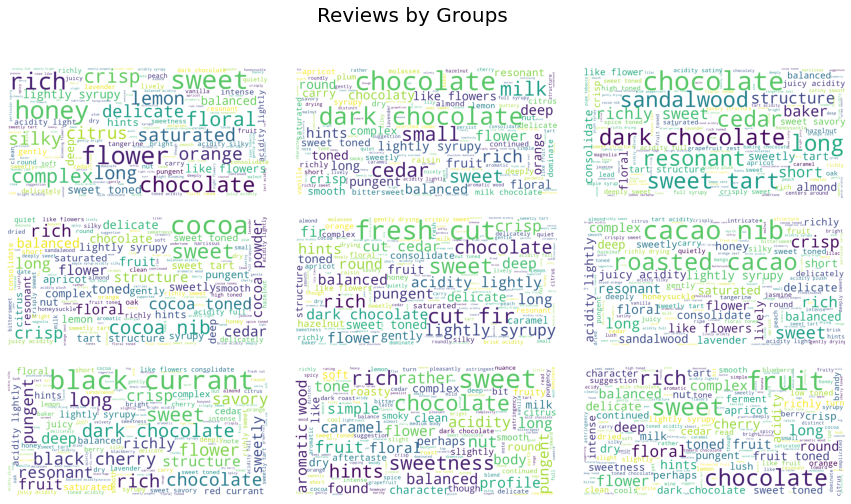

In [221]:
fig = plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=.1)
# fig.tight_layout()
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    wordcloud = topicWordCloud(reviews[i],'Reviews by Groups')

    ax.imshow(wordcloud)
    ax.axis('off')